In [1]:
import iris
from netCDF4 import Dataset
import numpy as np
import iris.pandas as ip
import os
from datetime import datetime, timedelta, date
import pandas as pd
from math import *
import matplotlib.pyplot as plt

if not os.path.isdir('csv_dataframes'): 
        os.mkdir('csv_dataframes')

if not os.path.isdir('pickle_jars'): 
        os.mkdir('pickle_jars')
        
def dataframe_maker(startdate, enddate, longitude, latitude, vwnd_file='working_data/vwnd.IGS.48to17.nc',
                    uwnd_file='working_data/uwnd.IGS.48to17.nc', s=True, ret=False):
#     need to add something to remove level i.e. iris.Constraint
    vwnd_lst = []
    uwnd_lst = []
    date_lst = []
    card_dir = []
    wind_dir_to = []
    wind_dir_from = []
    lon = int(longitude)
    lat = int(latitude)
    
    try:
        filename = os.path.join(vwnd_file)
    except:
        raise KeyboardInterrupt, 'need path to v-wind netcdf4 file'
    cubes = iris.load(filename)
    vwind = cubes[0]

    try:
        filename2 = os.path.join(uwnd_file)
    except:
        raise KeyboardInterrupt, 'need path to v-wind netcdf4 file'
    cubes2 = iris.load(filename2)
    uwind = cubes2[0]

    iris.FUTURE.cell_datetime_objects = True
    time_c = vwind.coord('time')
    
    try:
        year, month, day = startdate.split('-')
        year, month, day = int(year), int(month), int(day)
        d0 = date(1948, 1, 1)
        d1 = date(year, month, day)
        delta = d1 - d0
        if delta.days < 0:
            raise KeyboardInterrupt, 'start date before start of data'
#         elif delta.days >= 0:
        start_range = delta.days
    
        year, month, day = enddate.split('-')
        year, month, day = int(year), int(month), int(day)
        d0 = date(1948, 1, 1)
        d1 = date(year, month, day)
        delta = d1 - d0
        if delta.days < 0 or delta.days <= start_range:
            raise KeyboardInterrupt, 'end date before start of data or start date'
#         elif delta.days >= 0:
        end_range = delta.days+1
    except:
        raise KeyboardInterrupt, 'needs to be string in format YYYY-MM-DD'
    
    
    for i in range(start_range, end_range):
        df = ip.as_data_frame(vwind[int('{0}'.format(i))], copy=True)
        vwnd_lst.append(df[lon][lat])

        df2 = ip.as_data_frame(uwind[int('{0}'.format(i))], copy=True)
        uwnd_lst.append(df2[lon][lat])

        b = str(time_c.cell(int('{0}'.format(i))))[:10]
        date_lst.append(b)
    
    vws = pd.DataFrame(vwnd_lst,columns=['mean v-wind (m/s)'])
    uws = pd.DataFrame(uwnd_lst,columns=['mean u-wind (m/s)'])
    dates = pd.DataFrame(date_lst,columns=['date'])

    df = vws.join(uws)
    df = df.join(dates)
    
    for i in range(0, len(df)):
        u_ms = df['mean u-wind (m/s)'][i] 
        v_ms = df['mean v-wind (m/s)'][i] 
        wind_abs = np.sqrt(u_ms**2 + v_ms**2)
        wind_dir_trig_to = atan2(u_ms/wind_abs, v_ms/wind_abs) 
        wind_dir_trig_to_degrees = wind_dir_trig_to * 180/pi
        wind_dir_trig_from_degrees = wind_dir_trig_to_degrees + 180 
        wind_dir_cardinal = 90 - wind_dir_trig_from_degrees
        wind_dir_from.append(wind_dir_trig_from_degrees)
        wind_dir_to.append(wind_dir_trig_to_degrees)
    
    wd1 = pd.DataFrame(wind_dir_from, columns=['wind direction from (deg)'])
    wd2 = pd.DataFrame(wind_dir_to, columns=['wind direction to (deg)'])

    df = df.join(wd1)
    df = df.join(wd2)

    for i in range(0, len(df)):
        if df['wind direction from (deg)'][i] >= 348.75 or df['wind direction from (deg)'][i] < 11.25:
            direction = 'N'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 11.25 and df['wind direction from (deg)'][i] < 33.75:
            direction = 'NNE'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 33.75 and df['wind direction from (deg)'][i] < 56.25:
            direction = 'NE'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 56.25 and df['wind direction from (deg)'][i] < 78.75:
            direction = 'ENE'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 78.75 and df['wind direction from (deg)'][i] < 101.25:
            direction = 'E'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 101.25 and df['wind direction from (deg)'][i] < 123.75:
            direction = 'ESE'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 123.75 and df['wind direction from (deg)'][i] < 146.25:
            direction = 'SE'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 146.25 and df['wind direction from (deg)'][i] < 168.75:
            direction = 'SSE'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 168.75 and df['wind direction from (deg)'][i] < 191.25:
            direction = 'S'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 191.25 and df['wind direction from (deg)'][i] < 213.75:
            direction = 'SSW'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 213.75 and df['wind direction from (deg)'][i] < 236.25:
            direction = 'SW'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 236.25 and df['wind direction from (deg)'][i] < 258.75:
            direction = 'WSW'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 258.75 and df['wind direction from (deg)'][i] < 281.25:
            direction = 'W'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 281.25 and df['wind direction from (deg)'][i] < 303.75:
            direction = 'WNW'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 303.75 and df['wind direction from (deg)'][i] < 326.25:
            direction = 'NW'
            card_dir.append(direction)
        elif df['wind direction from (deg)'][i] >= 326.25 and df['wind direction from (deg)'][i] < 348.75:
            direction = 'NNW'
            card_dir.append(direction)

    dir1 = pd.DataFrame(card_dir, columns=['cardinal direction'])
    df = df.join(dir1)
    df['wind speed in direction'] = np.sqrt(df['mean u-wind (m/s)']**2 + df['mean v-wind (m/s)']**2)


    df.index = df["date"]  
    del df['date']

    firstDate = df.index[0]
    lastDate = df.index[len(df['mean u-wind (m/s)'])-1]
    df = df.reindex(index=pd.date_range(start = firstDate, end = lastDate), fill_value = None) 
    
    if s == True:
        df.to_csv(os.path.join('csv_dataframes', "igs_{0}{1}{2}to{3}{4}{5}_{6}{7}.csv".format(startdate[8:10], startdate[5:7], startdate[2:4],
                                                                                          enddate[8:10], enddate[5:7], enddate[2:4], str(lon), str(lat))))
        df.to_pickle(os.path.join('pickle_jars',"igs_{0}{1}{2}to{3}{4}{5}_{6}{7}.pkl".format(startdate[8:10], startdate[5:7], startdate[2:4],
                                                                                         enddate[8:10], enddate[5:7], enddate[2:4], str(lon), str(lat))))
    
    if ret == True:
        return df
    
    else:
        print('done!')
        

In [2]:
dataframe_maker(startdate='2016-12-20', enddate='2017-01-01', longitude='240', latitude='50', s=False, ret=True)
# NOTE: 10 years takes around 90 seconds
# 40 years = 5 mins

/Applications/anaconda/envs/test-netcdf4/lib/python2.7/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


,mean v-wind (m/s),mean u-wind (m/s),wind direction from (deg),wind direction to (deg),cardinal direction,wind speed in direction
2016-12-20,1.025000,49.324997,268.809534,88.809534,W,49.335646
2016-12-21,-15.350000,26.600002,299.987853,119.987853,WNW,30.711279
2016-12-22,7.325000,30.099998,256.322621,76.322621,WSW,30.978469
2016-12-23,17.100000,25.900002,236.565945,56.565945,WSW,31.035787
2016-12-24,9.749999,9.425001,224.028984,44.028984,SW,13.560720
2016-12-25,-25.225000,3.550000,351.989181,171.989181,N,25.473577
2016-12-26,-9.675000,18.825003,297.200633,117.200633,WNW,21.165688
2016-12-27,11.200001,26.225002,246.873961,66.873961,WSW,28.516500
2016-12-28,-16.400002,40.549999,292.020329,112.020329,WNW,43.740856
2016-12-29,-3.899999,61.825005,273.609508,93.609508,W,61.947891


In [8]:
import matplotlib.pyplot as plt
import iris
from netCDF4 import Dataset
import numpy as np
import iris.pandas as ip
import os
from datetime import datetime, timedelta, date
import pandas as pd
from math import *

def time_series_maker(startdate, enddate, longitude, latitude, variable, myWindow=12, running_mean=False, 
                      vwnd_file='working_data/vwnd.IGS.48to17.nc', uwnd_file='working_data/uwnd.IGS.48to17.nc'):
    vwnd_lst = []
    uwnd_lst = []
    date_lst = []
    card_dir = []
    wind_dir_to = []
    wind_dir_from = []
    lon = int(longitude)
    lat = int(latitude)
    
    
    try:
        filename = os.path.join(vwnd_file)
    except:
        raise KeyboardInterrupt, 'need path to v-wind netcdf4 file'
    cubes = iris.load(filename)
    vwind = cubes[0]

    try:
        filename2 = os.path.join(uwnd_file)
    except:
        raise KeyboardInterrupt, 'need path to v-wind netcdf4 file'
    cubes2 = iris.load(filename2)
    uwind = cubes2[0]

    iris.FUTURE.cell_datetime_objects = True
    time_c = vwind.coord('time')
    
    try:
        year, month, day = startdate.split('-')
        year, month, day = int(year), int(month), int(day)
        d0 = date(1948, 1, 1)
        d1 = date(year, month, day)
        delta = d1 - d0
        if delta.days < 0:
            raise KeyboardInterrupt, 'start date before start of data'
#         elif delta.days >= 0:
        start_range = delta.days
    
        year, month, day = enddate.split('-')
        year, month, day = int(year), int(month), int(day)
        d0 = date(1948, 1, 1)
        d1 = date(year, month, day)
        delta = d1 - d0
        if delta.days < 0 or delta.days <= start_range:
            raise KeyboardInterrupt, 'end date before start of data or start date'
#         elif delta.days >= 0:
        end_range = delta.days+1
    except:
        raise KeyboardInterrupt, 'needs to be string in format YYYY-MM-DD'
    
    
    for i in range(start_range, end_range):
        df = ip.as_data_frame(vwind[int('{0}'.format(i))], copy=True)
        vwnd_lst.append(df[lon][lat])

        df2 = ip.as_data_frame(uwind[int('{0}'.format(i))], copy=True)
        uwnd_lst.append(df2[lon][lat])

        b = str(time_c.cell(int('{0}'.format(i))))[:10]
        date_lst.append(b)
    
    vws = pd.DataFrame(vwnd_lst,columns=['mean v-wind (m/s)'])
    uws = pd.DataFrame(uwnd_lst,columns=['mean u-wind (m/s)'])
    dates = pd.DataFrame(date_lst,columns=['date'])

    df = vws.join(uws)
    df = df.join(dates)
    
    # make list of valid options i.e. wdf, winddirfrom, wdt, winddirto
    if variable == 'wind direction from' or 'wind direction to':
        for i in range(0, len(df)):
            u_ms = df['mean u-wind (m/s)'][i] 
            v_ms = df['mean v-wind (m/s)'][i] 
            wind_abs = np.sqrt(u_ms**2 + v_ms**2)
            wind_dir_trig_to = atan2(u_ms/wind_abs, v_ms/wind_abs) 
            wind_dir_trig_to_degrees = wind_dir_trig_to * 180/pi
            wind_dir_trig_from_degrees = wind_dir_trig_to_degrees + 180 
            wind_dir_cardinal = 90 - wind_dir_trig_from_degrees
            wind_dir_from.append(wind_dir_trig_from_degrees)
            wind_dir_to.append(wind_dir_trig_to_degrees)
    
        wd1 = pd.DataFrame(wind_dir_from, columns=['wind direction from (deg)'])
        wd2 = pd.DataFrame(wind_dir_to, columns=['wind direction to (deg)'])

        df = df.join(wd1)
        df = df.join(wd2)

    if variable == 'wind speed in direction':
        df['wind speed in direction'] = np.sqrt(df['mean u-wind (m/s)']**2 + df['mean v-wind (m/s)']**2)


    df.index = df["date"]  
    del df['date']

    firstDate = df.index[0]
    lastDate = df.index[len(df['mean u-wind (m/s)'])-1]
    df = df.reindex(index=pd.date_range(start = firstDate, end = lastDate), fill_value = None) 

    if variable == 'v-wind':
        if running_mean == True:
            df[startdate : enddate]['mean v-wind (m/s)'].plot()
            mw = df[startdate : enddate]['mean v-wind (m/s)'].rolling(window=myWindow,center=True).mean()
            mw.plot(style='-r', label = "{0}hr Moving Window".format(myWindow))
            plt.show()
        else: 
            df[startdate : enddate]['mean v-wind (m/s)'].plot()
            plt.show()
        
    elif variable == 'u-wind':
        if running_mean == True:
            df[startdate : enddate]['mean u-wind (m/s)'].plot()
            mw = df[startdate : enddate]['mean u-wind (m/s)'].rolling(window=myWindow,center=True).mean()
            mw.plot(style='-r', label = "{0}hr Moving Window".format(myWindow))
            plt.show()
        else: 
            df[startdate : enddate]['mean u-wind (m/s)'].plot()
            plt.show()
            
    elif variable == 'wind direction from':
        if running_mean == True:
            df[startdate : enddate]['wind direction from (deg)'].plot()
            mw = df[startdate : enddate]['wind direction from (deg)'].rolling(window=myWindow,center=True).mean()
            mw.plot(style='-r', label = "{0}hr Moving Window".format(myWindow))
            plt.show()
        else:
            df[startdate : enddate]['wind direction from (deg)'].plot()
            plt.show()
        
    
    elif vairable == 'wind direction to':
        if running_mean == True:
            df[startdate : enddate]['wind direction to (deg)'].plot()
            mw = df[startdate : enddate]['wind direction to (deg)'].rolling(window=myWindow,center=True).mean()
            mw.plot(style='-r', label = "{0}hr Moving Window".format(myWindow))
            plt.show()
        else:
            df[startdate : enddate]['wind direction to (deg)'].plot()
            plt.show()
        
        
    elif variable == 'wind speed in direction':
        if running_mean == True:
            df[startdate : enddate]['wind speed in direction'].plot()
            mw = df[startdate : enddate]['wind speed in direction'].rolling(window=myWindow,center=True).mean()
            mw.plot(style='-r', label = "{0}hr Moving Window".format(myWindow))
            plt.show()
        else:
            df[startdate : enddate]['wind speed in direction'].plot()
            plt.show()
        
        
    else:
        raise KeyboardInterrupt, 'enter valid variable'
        

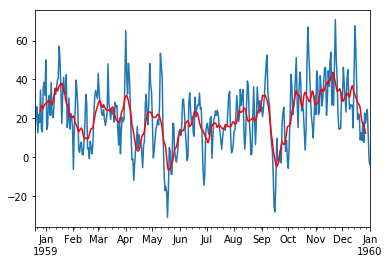

In [20]:
# 10 years takes 2 mins
time_series_maker(startdate='1958-12-20', enddate='1960-01-01', longitude='240', latitude='50', 
                  variable='u-wind', running_mean=True, myWindow=12)

In [5]:
from datetime import datetime, timedelta, date
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import numpy as np

def map_maker(data, date_needed, llat=20, llon=180, ulat=90, ulon=320., vmin=-60, vmax=60, colorbar=True):
    try: 
        year, month, day = date_needed.split('-')
        year, month, day = int(year), int(month), int(day)
        d0 = date(1977, 1, 1)
        d1 = date(year, month, day)
        delta = d1 - d0
        if delta.days < 0:
            raise KeyboardInterrupt, 'date before start of data'
        day = delta.days
    except:
        raise KeyboardInterrupt, 'needs to be YYYY-MM-DD'
        
    if data == 'v-wind':
        filename = os.path.join('working_data/vwind.IGS.77to17.nc')
        fh = Dataset(filename)
        vwind = fh.variables['vwnd'][day] 
        tmax_units = fh.variables['vwnd'].units
        
    elif data == 'u-wind':
        filename = os.path.join('working_data/uwind.IGS.77to17.nc')
        fh = Dataset(filename)
        vwind = fh.variables['uwnd'][day] # day from 01-01-1977 
        tmax_units = fh.variables['uwnd'].units
    
    lons = fh.variables['lon'][:]
    lats = fh.variables['lat'][:]
    lon_0 = lons.mean()
    lat_0 = lats.mean()

    m=Basemap(projection='cyl', llcrnrlon=llon, \
      urcrnrlon=ulon, llcrnrlat=llat,urcrnrlat=ulat, \
        resolution='c')
    lon, lat = np.meshgrid(lons, lats)
    xi, yi = m(lon, lat)
    cs = m.pcolor(xi,yi,np.squeeze(vwind), cmap='RdBu_r', vmin=vmin, vmax=vmax) # change vmax

    # Add Grid Lines
    m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=8)
    m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=8)
    m.drawcoastlines()
    if colorbar == True:
        cbar = m.colorbar(cs, location='bottom', pad="10%")
        cbar.set_label(tmax_units)
        
    return m

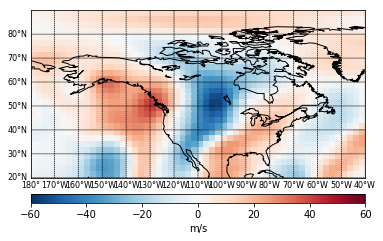

In [6]:
map_maker(data = 'v-wind', date_needed = '2016-01-26') # can change lat/lon and scale
plt.show()

In [25]:
from igsmakerlib import dataframe_maker
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import matplotlib.cm as cm

def windrose_maker(startdate, enddate, longitude, latitude, title, filename=None, yticks=None, save=False, to_return=True):
    df = dataframe_maker(startdate, enddate, longitude, latitude, s=False, ret=True)

    df.name = title
    df.filename = filename
    plt.rcParams['axes.titlepad'] = 20
    ax = WindroseAxes.from_ax()
    ax.contourf(df['wind direction from (deg)'], df['wind speed in direction'], bins=np.arange(0, 90, 10), cmap=cm.hot)
    ax.set_legend()
    ax.legend(loc=6, bbox_to_anchor=(1.0,0.2), title = 'm/s')
    ax.set_title(df.name, size = 16)
    if yticks == None:
        pass
    else:
        ax.set_yticks(np.array(yticks));# six labels on original
        # ax.set_yticklabels(['200 (n)', '400 (n)', '600 (n)', '800 (n)', '1000 (n)'])
    if save == True:
        plt.savefig(os.path.join('figures','{0}_windrose.png'.format(df.filename)), bbox_inches='tight')
        plt.close()
    if to_return == True:
        return ax
    

In [1]:
from igsmakerlib import windrose_maker
import matplotlib.pyplot as plt

In [2]:
help(windrose_maker)

Help on function windrose_maker in module igsmakerlib:

windrose_maker(startdate, enddate, longitude, latitude, title, filename=None, yticks=None, save=False, to_return=True)



/Applications/anaconda/envs/test-netcdf4/lib/python2.7/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/Applications/anaconda/envs/test-netcdf4/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


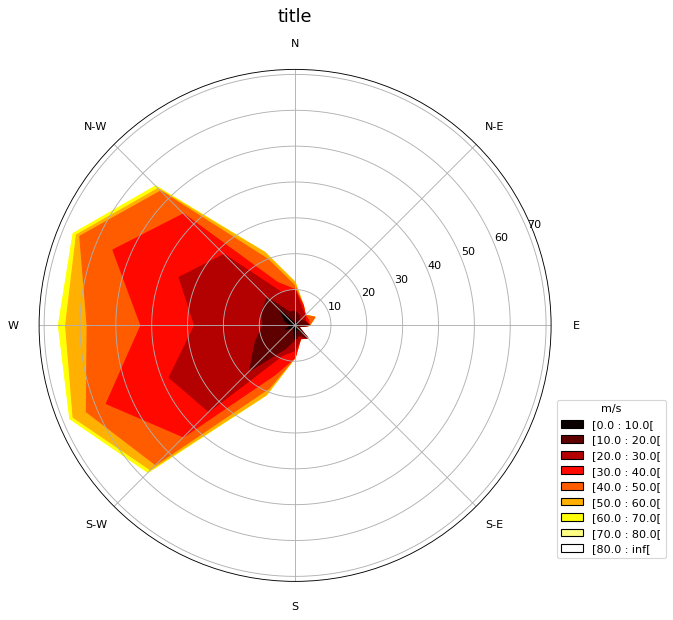

In [1]:
from igsmakerlib import *
# sometimes prints three first, Also you can save
ax = windrose_maker(startdate='1948-12-20', enddate='1950-01-31', longitude='220', latitude='50', title='title',
               filename='Dec 2016 to Jan 2017. (Cell = 120W 50N)')# yticks=[200.0, 400.0, 600.0, 800.0, 1000.0])
plt.show()